# Exploratory Data Analysis for Machine Learning

# Project. Airbnb in New York
- Download New York Airbnb data from Kaggle.com.
- Perform a complete EDA including all steps of the process.
- Write down the conclusions of each step and analyze the results on the relationships between the variables.

A company has collected New York housing rental data from the Airbnb app during 2019. This dataset was used to train Machine Learning models during that year, in an open competition.

We will now use it to conduct a study about the variables that make up the dataset in order to understand it and draw conclusions about it.

# Step 1: Problem statement and data collection

In [1]:
import requests
import os
from pathlib import Path

def setup_project_structure(base_path, subfolders):
    """Creates a standard data science directory tree."""
    for folder in subfolders:
        folder_path = Path(base_path) / folder
        folder_path.mkdir(parents=True, exist_ok=True)
    print(f"Project structure initialized in: {base_path}")

def download_dataset_to_raw(url, full_path):
    """Downloads a file to a specific path."""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(full_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Download successful! Saved to: {full_path}")
        return True
    except Exception as e:
        print(f"Download failed: {e}")
        return False

# --- CONFIGURATION ---
BASE_DIR = "./data"
FOLDERS = ["raw", "processed", "interim"]
DATA_URL = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
TARGET_FILE = "AB_NYC_2019.csv"

# EXECUTION
# Build the whole house
setup_project_structure(BASE_DIR, FOLDERS)

# Put the data in the 'raw' room
RAW_FILE_PATH = Path(BASE_DIR) / "raw" / TARGET_FILE
download_dataset_to_raw(DATA_URL, RAW_FILE_PATH)

Project structure initialized in: ./data
Download successful! Saved to: data/raw/AB_NYC_2019.csv


True

In [2]:
import pandas as pd

try:
    df = pd.read_csv(RAW_FILE_PATH)
    print("\nDataset loaded successfully into a DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"\nError: File not found at {RAW_FILE_PATH}")


Dataset loaded successfully into a DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private roo

# Step 2: Exploration and data cleaning

In [3]:
# Know dimension and tipology
df.shape

(48895, 16)

In [4]:
# First glance of top 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Data sum-up about data types and non-nulls values from the df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# understand how many unique values are there in the dataset
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Inspections about the data info
- there is a total of 48895 rows and 16 columns.
# Numeric characteristics:
- INTEGER Dtype are 7: id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count and availability_365.
- FLOAT Dtype are 3: latitude, longitude and reviews_per_month.
# Categorical characteristics:
- OBJECT Dtype are 6: name, host_name, neighbourhood_group, neighbourhood, room_type and last_review.
# Non-Null checking:
- INTEGER: All of the rows are ok with no empty cells, we can say 100% ok.
- FLOAT: 1 out of three reviews_per_month is missing at least 10K values.
- OBJECT: The column last_review, is missing at least 10k values. Probably we leave this column with those empty values as they might not be very important for the stattistical analysis. 

In [7]:
# Check for duplicates values
df.duplicated(subset= ['id', 'host_id']).sum()

np.int64(0)

In [8]:
# Drop duplicates in case we have some just to be sure
df = df.drop_duplicates(subset = df.columns.difference(['id', 'host_id']))
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Eliminate irrelevant information
I will eliminate the columns ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'] as these are columns with a lot of unique values and also do not affect the target variable **price**

In [9]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis= 1)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


# Step 3: Analysis of univariate variables
# Analysis of categorical variables

In [10]:
# Select only columns with 'object' data type (strings/categories)
categorical = df.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical variables: {categorical}")

Categorical variables: ['neighbourhood_group', 'neighbourhood', 'room_type']


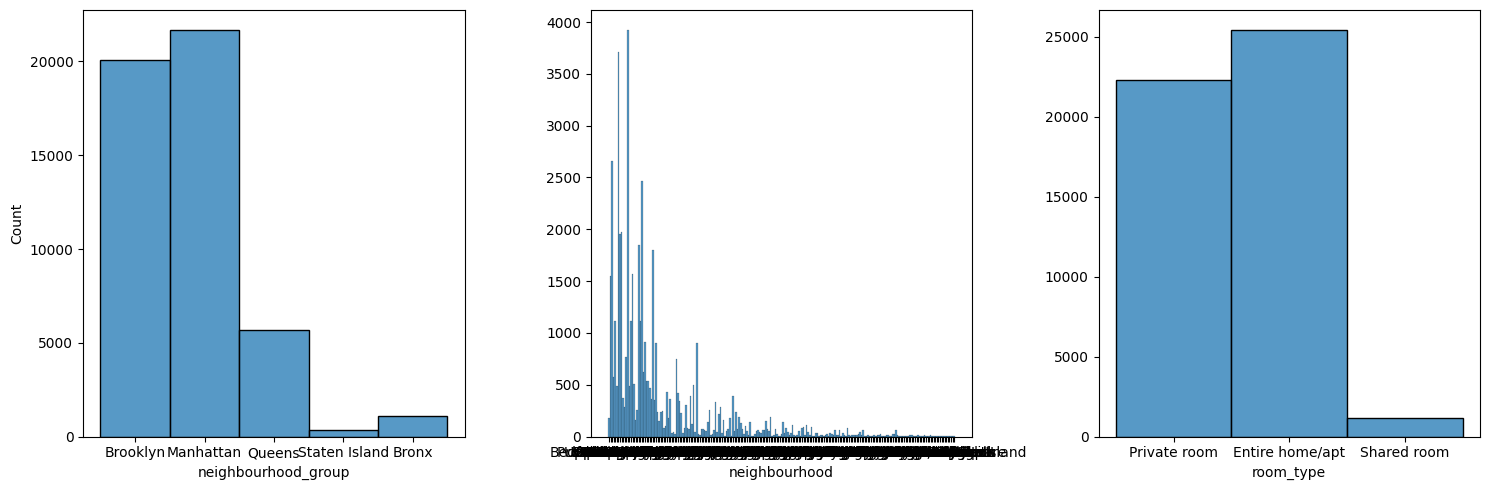

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(ncols= 3, figsize = (15, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Conclusions about categorical variable
- **neighbourhood_group**, Manhattan and Brooklyn clearly dominate the NYC Airbnb market. The "Long Tail": Queens has a significant presence, but Staten Island and the Bronx are very small in comparison.
- **room_type**, "Entire home/apt" is the most popular listing type, closely followed by "Private room."
- **neighbourhood**, The middle chart is very "noisy" because there are over 200 neighborhoods. This confirms that this variable is too granular to visualize effectively in a basic histogram.

# Analysis on numeric variables

In [12]:
# Select only columns with 'int or float' data type (numeric)
numerics = df.select_dtypes(include=['number']).columns.tolist()

print(f"Numeric variables: {numerics}")

Numeric variables: ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


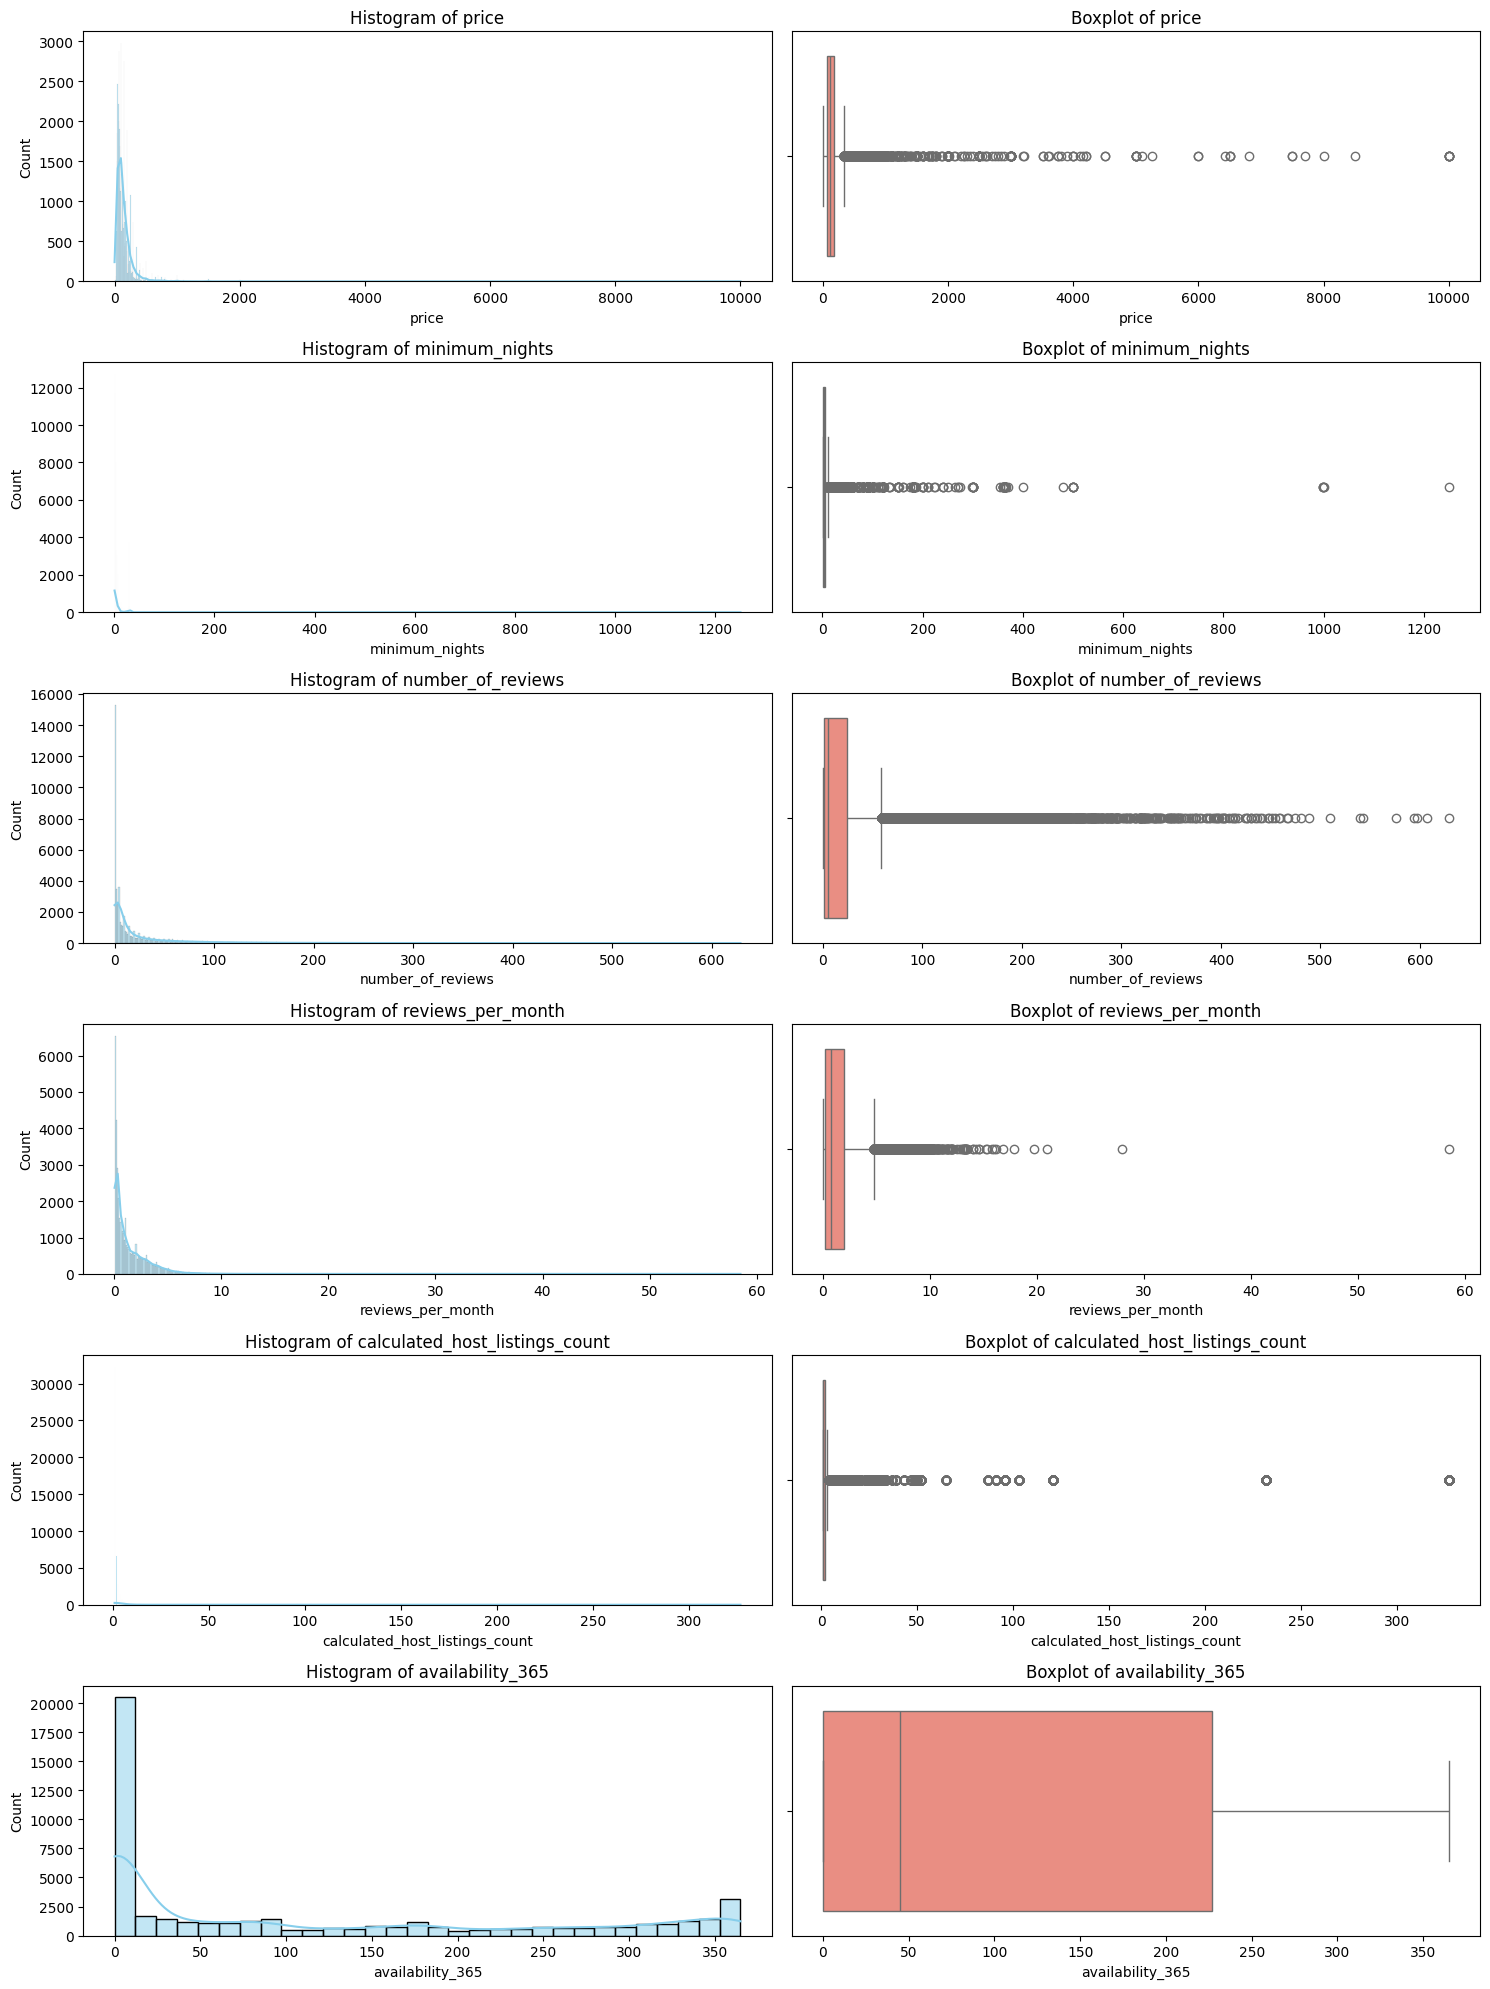

In [13]:
# Set up the figure grid
# We create 2 columns (Hist and Box) for every numerical variable
fig, axes = plt.subplots(nrows=len(numerics), ncols=2, figsize=(15, 20))

# Loop through columns and plot
for i, col in enumerate(numerics):
    # Histogram - shows the shape of the distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot - clearly highlights the outliers
    sns.boxplot(x=df[col], ax=axes[i, 1], color="salmon")
    axes[i, 1].set_title(f'Boxplot of {col}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Conclusions for numerical variable charts
- The price histogram is heavily "squashed" to the left. This indicates that while most listings are affordable, a few extreme outliers (up to $10,000) are distorting the scale.
- Minimum Nights Anomalies: Most people stay 1–3 nights, but the boxplot shows several listings requiring over 1,000 nights.
- The availability_365 chart shows two peaks (bimodal): many listings have 0 availability (possibly inactive or fully booked), while another group is available almost year-round.
- The calculated_host_listings_count reveals that while most hosts are 1 listin), there are mega-hosts managing over 300 properties.

# Step 4: Analysis of multivariate variables
# Numerical-numerical analysis

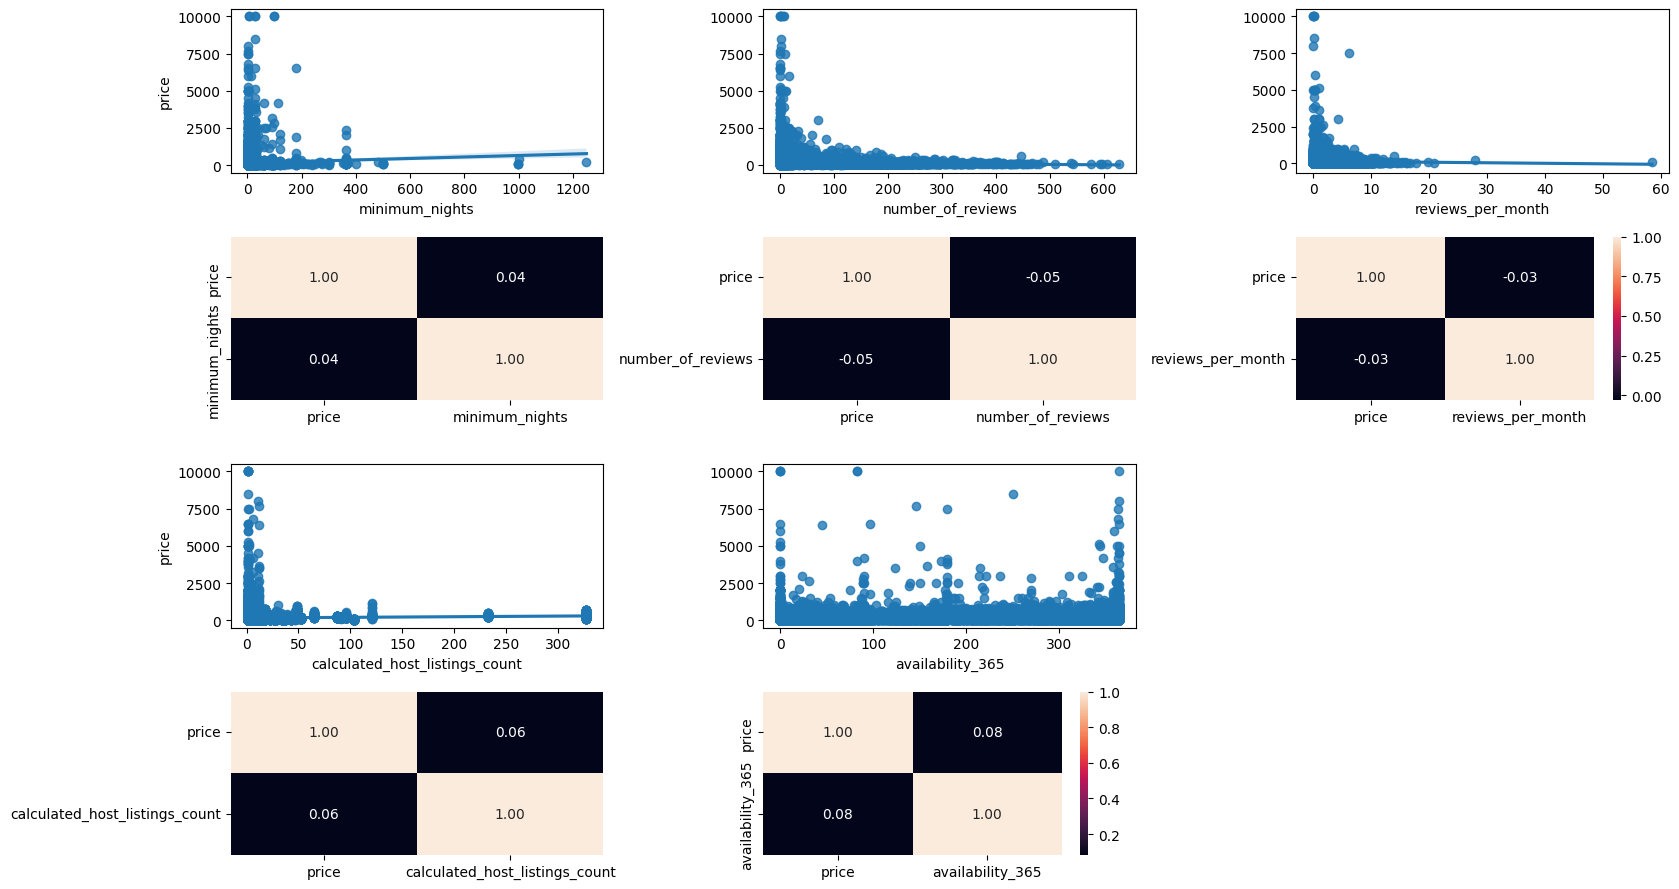

In [14]:
fig, axis = plt.subplots(4, 3, figsize = (17, 9))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "reviews_per_month", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price")
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

axis[2, 2].set_visible(False)
axis[3, 2].set_visible(False)

# Mostrar el plot
plt.show()

# Conclusion on numerical - numerical
- Extreme Outliers, The Boxplots for price and minimum_nights show significant outliers. Some prices reach $10,000, and some minimum stays exceed 1,000 nights.
- Heavy Right Skew: Most variables (price, reviews, host counts) are heavily right-skewed. This means the "average" is heavily influenced by a few high-value listings.
- Bimodal Availability: availability_365 shows a unique "U-shape." Many listings are either never available (0 days, likely inactive) or always available (365 days).

I will also check the relation between number_of_reviews vs. availability_365 using the same chart analysis

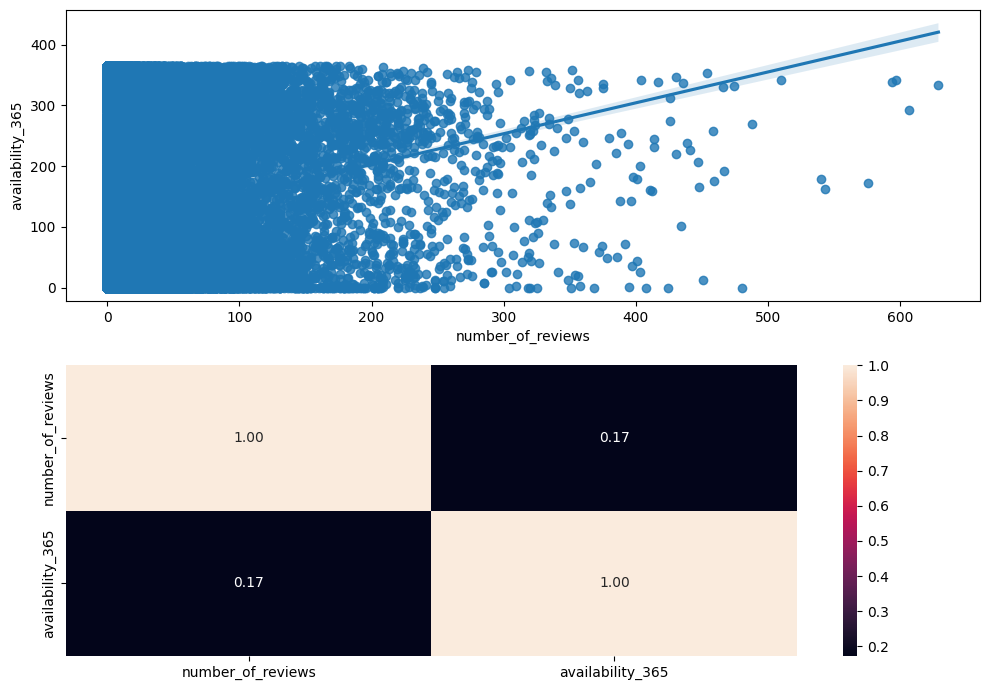

In [18]:
fig, axis = plt.subplots(nrows= 2, figsize = (10, 7))

sns.regplot(ax= axis[0], data = df, x = "number_of_reviews", y = "availability_365") 
sns.heatmap(df[["number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f", ax= axis[1])

plt.tight_layout()
plt.show()

**Conclusion:** The correlation of 0.17 shows a very slight positive trend—listings that are open more days tend to have slightly more reviews—but it is still a weak relationship.

# Categorical-categorical analysis

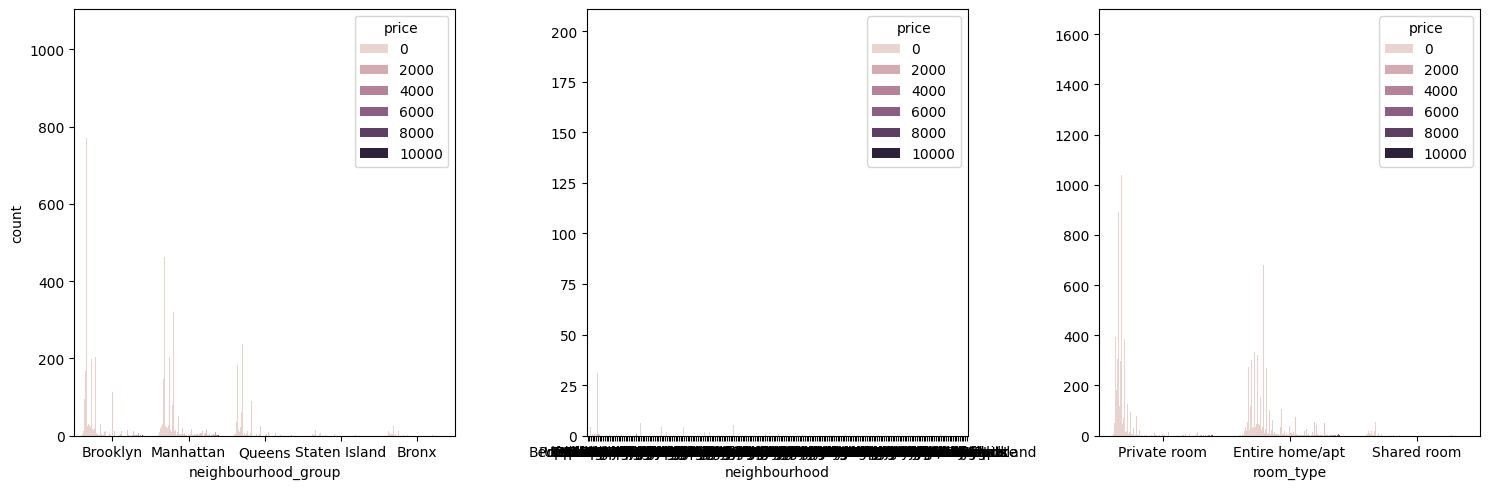

In [27]:
fig, axis = plt.subplots(ncols= 3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = df, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "room_type", hue = "price").set(ylabel = None)

plt.tight_layout()

plt.show()

/tmp/ipykernel_740/1817320213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')


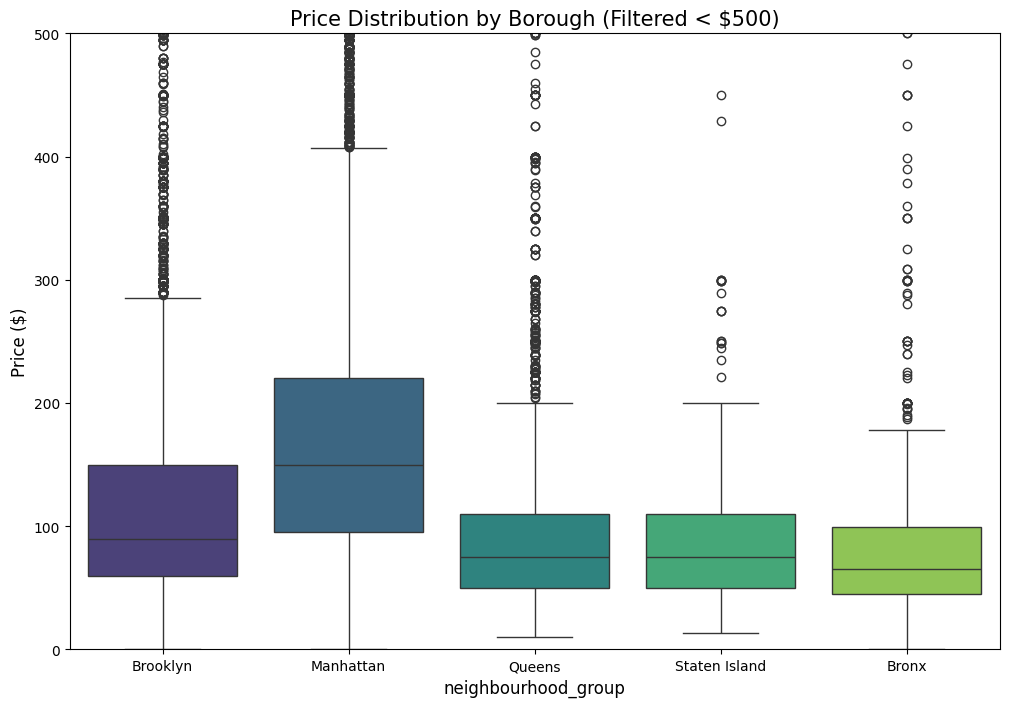

In [28]:
plt.figure(figsize=(12, 8))

# We use a limit of $500 to focus on the "normal" market range
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')

plt.ylim(0, 500) # This "zooms in" so the boxes are readable
plt.title('Price Distribution by Borough (Filtered < $500)', fontsize=15)
plt.xlabel('neighbourhood_group', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.show()

# Conclusion on categorical - categorical analysis
- **Neighbourhood Group vs. Price**, the vast majority of listings fall into the lowest price category (darkest bars). However, Manhattan shows a much "thicker" distribution of bars across different price levels.
- **Room Type vs. Price**, "Entire home/apt" shows the most significant price variation. "Private rooms" and "Shared rooms" are almost entirely concentrated in the lowest price bracket.
- **Neighbourhood vs. Price**, this chart highlights "Listing Density." A few specific neighborhoods have massive amounts of listings, but nearly all of them are concentrated in the lower price brackets.

# Combinations of room_type with various predictors

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()